In [13]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
pkl_file = open("Server/TRs_wise_amydgala_group_results_10000_perms.pkl", "rb")
TRs_results_amygdala = pickle.load(pkl_file)
pkl_file.close()
data

,Behavior,Connection,r,p,perm_p
0,cov_total,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1,-0.032258,0.005610,0.0056
1,DASS_dep,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1,0.028334,0.014987,0.0154
2,DASS_anx,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1,-0.005287,0.649915,0.6397
3,DASS_str,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1,-0.046308,0.000070,0.0002
4,bas_d,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1,-0.029946,0.010137,0.0121
...,...,...,...,...,...
235,BIG5_con,Right Amygdala_x_Right Hippocampus,0.036687,0.001631,0.0020
236,BIG5_neu,Right Amygdala_x_Right Hippocampus,0.006296,0.588900,0.5889
237,BIG5_ope,Right Amygdala_x_Right Hippocampus,-0.016775,0.149842,0.1488
238,erq_cr,Right Amygdala_x_Right Hippocampus,-0.014559,0.211371,0.2124


In [15]:
behavior_data = pd.read_excel('ordered_by_sub_behavior_score.xlsx')
start_column_name = "cov_total"  # the name of the column you want to start from
behaviors = list(behavior_data.columns[behavior_data.columns.get_loc(start_column_name):])

In [16]:
TRs_significant = TRs_results_amygdala[TRs_results_amygdala['perm_p'] < 0.05]
TRs_significant = TRs_significant.reset_index(drop=True)
unique_names_TRs = TRs_significant['Connection'].unique()
TRs_significant

,Behavior,Connection,r,p,perm_p
0,cov_total,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1,-0.032258,0.005610,0.0056
1,DASS_dep,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1,0.028334,0.014987,0.0154
2,DASS_str,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1,-0.046308,0.000070,0.0002
3,bas_d,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1,-0.029946,0.010137,0.0121
4,bas_f,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1,-0.040513,0.000503,0.0006
...,...,...,...,...,...
142,bas_r,Right Amygdala_x_Right Hippocampus,0.042175,0.000292,0.0004
143,BIG5_ext,Right Amygdala_x_Right Hippocampus,0.049547,0.000021,0.0000
144,BIG5_agr,Right Amygdala_x_Right Hippocampus,0.048453,0.000032,0.0000
145,BIG5_con,Right Amygdala_x_Right Hippocampus,0.036687,0.001631,0.0020


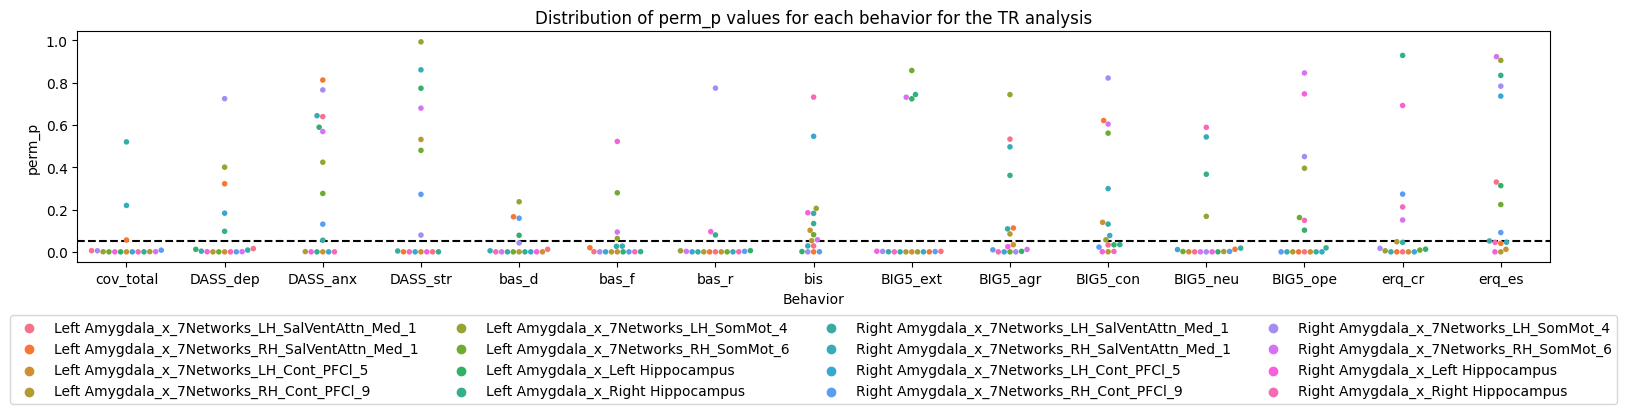

In [19]:
plt.figure(figsize=(19, 3))
sns.swarmplot(data=TRs_results_amygdala, x='Behavior', y='perm_p', s=4, hue='Connection')

plt.xticks(TRs_results_amygdala['Behavior'].unique())
plt.axhline(y=0.05, color='black', linestyle='--')

plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.title('Distribution of perm_p values for each behavior for the TR analysis')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

plt.show()

In [29]:
def sub_data(data):
    mask1= data['Behavior'].str.contains('cov_tot') | \
            data['Behavior'].str.contains('DASS_dep') | \
            data['Behavior'].str.contains('DASS_anx') | \
            data['Behavior'].str.contains('DASS_str') | \
            data['Behavior'].str.contains('bas_d') | \
            data['Behavior'].str.contains('bas_f') | \
            data['Behavior'].str.contains('bas_r') | \
            data['Behavior'].str.contains('bis') 
    mask2=data['Behavior'].str.contains('BIG5_ext') | \
            data['Behavior'].str.contains('BIG5_agr') | \
            data['Behavior'].str.contains('BIG5_con') | \
            data['Behavior'].str.contains('BIG5_neu') | \
            data['Behavior'].str.contains('BIG5_ope') | \
            data['Behavior'].str.contains('erq_cr') | \
            data['Behavior'].str.contains('erq_es')
    
    sub_data1 = data[mask1]
    sub_data2 = data[mask2]
    return sub_data1, sub_data2
    

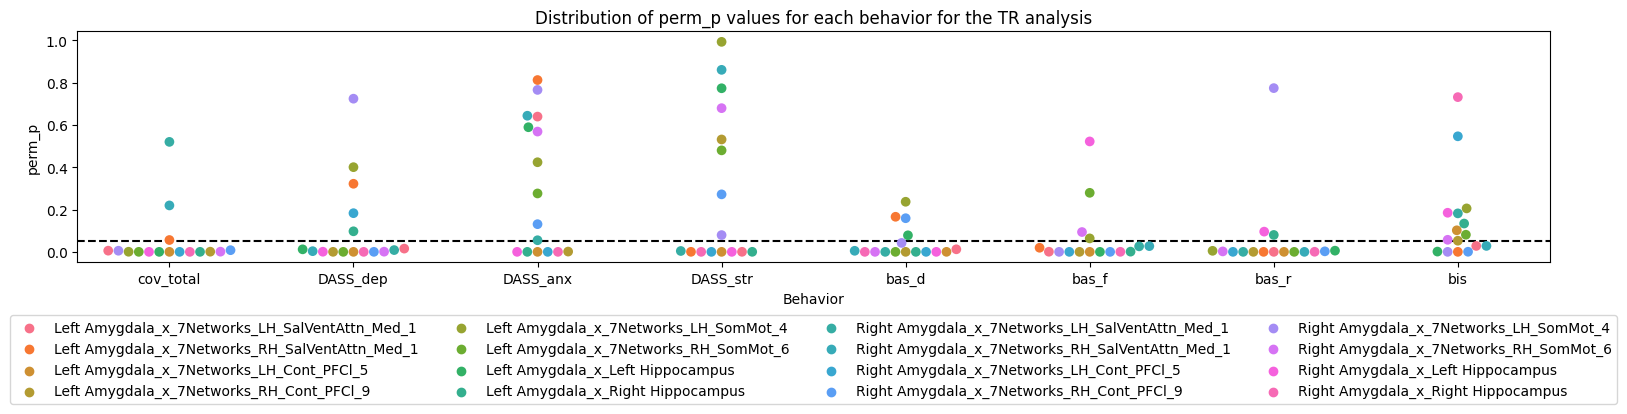

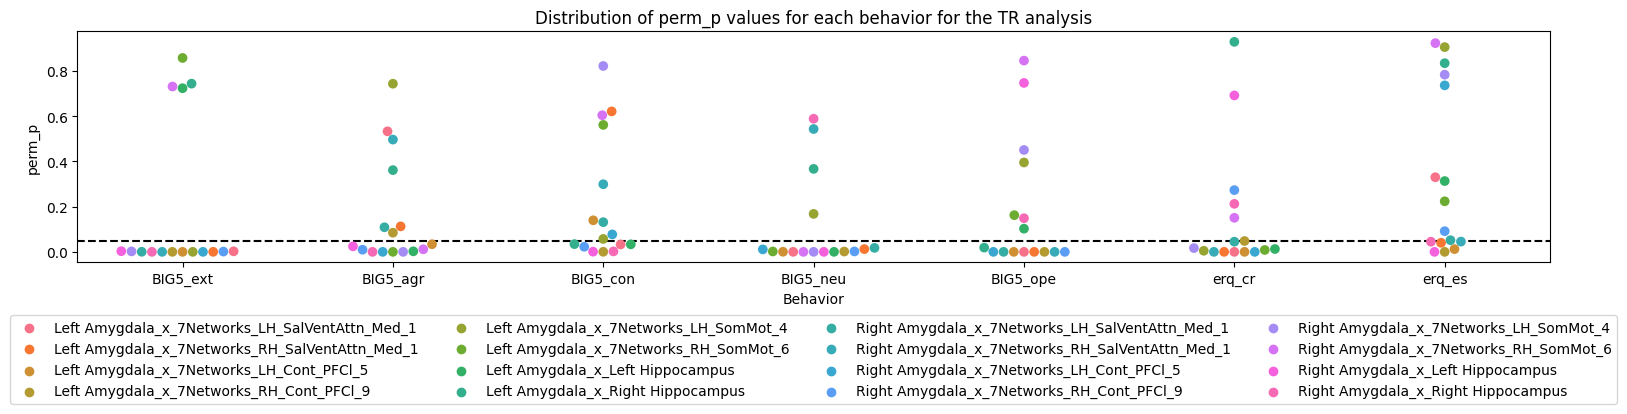

In [32]:
TRs_results_amygdala_sub1, TRs_results_amygdala_sub2 = sub_data(TRs_results_amygdala)
plt.figure(figsize=(19, 3))
sns.swarmplot(data=TRs_results_amygdala_sub1, x='Behavior', y='perm_p', s=7, hue='Connection')

plt.xticks(TRs_results_amygdala_sub1['Behavior'].unique())
plt.axhline(y=0.05, color='black', linestyle='--')

plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.title('Distribution of perm_p values for each behavior for the TR analysis')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

plt.show()

plt.figure(figsize=(19, 3))
sns.swarmplot(data=TRs_results_amygdala_sub2, x='Behavior', y='perm_p', s=7, hue='Connection')

plt.xticks(TRs_results_amygdala_sub2['Behavior'].unique())
plt.axhline(y=0.05, color='black', linestyle='--')

plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.title('Distribution of perm_p values for each behavior for the TR analysis')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)

plt.show()

Movie Wise

In [12]:
group_movie_df = pd.read_csv("Server/all_amygd_Movie_wise_group_analysis_500_perms.csv")
group_movie_df 

,Behavior,Connection,r,p,perm_p
0,cov_total,Left Amygdala_x_7Networks_LH_SomMot_4,0.009572,8.581796e-01,0.860
1,cov_total,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1,-0.046139,3.888003e-01,0.394
2,cov_total,Left Amygdala_x_7Networks_LH_Cont_PFCl_5,0.054746,3.064111e-01,0.304
3,cov_total,Left Amygdala_x_7Networks_RH_SomMot_6,-0.018946,7.235546e-01,0.738
4,cov_total,Left Amygdala_x_7Networks_RH_SalVentAttn_Med_1,-0.016084,7.639686e-01,0.738
...,...,...,...,...,...
1769275,erq_es,Right Amygdala_x_Right Hippocampus_TR-7367,0.433272,1.703937e-17,0.000
1769276,erq_es,Right Amygdala_x_Right Hippocampus_TR-7368,0.407562,1.769344e-15,0.000
1769277,erq_es,Right Amygdala_x_Right Hippocampus_TR-7369,0.384654,8.010437e-14,0.000
1769278,erq_es,Right Amygdala_x_Right Hippocampus_TR-7370,0.354133,8.272799e-12,0.000


In [13]:
only_movie = group_movie_df[~group_movie_df['Connection'].str.contains('TR-')] #remove the TR analysis to the result
only_movie = only_movie.reset_index(drop=True)
only_movie

,Behavior,Connection,r,p,perm_p
0,cov_total,Left Amygdala_x_7Networks_LH_SomMot_4,0.009572,0.858180,0.860
1,cov_total,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1,-0.046139,0.388800,0.394
2,cov_total,Left Amygdala_x_7Networks_LH_Cont_PFCl_5,0.054746,0.306411,0.304
3,cov_total,Left Amygdala_x_7Networks_RH_SomMot_6,-0.018946,0.723555,0.738
4,cov_total,Left Amygdala_x_7Networks_RH_SalVentAttn_Med_1,-0.016084,0.763969,0.738
...,...,...,...,...,...
235,erq_es,Right Amygdala_x_7Networks_RH_SomMot_6,0.040744,0.446699,0.446
236,erq_es,Right Amygdala_x_7Networks_RH_SalVentAttn_Med_1,0.020828,0.697372,0.742
237,erq_es,Right Amygdala_x_7Networks_RH_Cont_PFCl_9,0.040570,0.448640,0.486
238,erq_es,Right Amygdala_x_Left Hippocampus,0.028425,0.595587,0.596


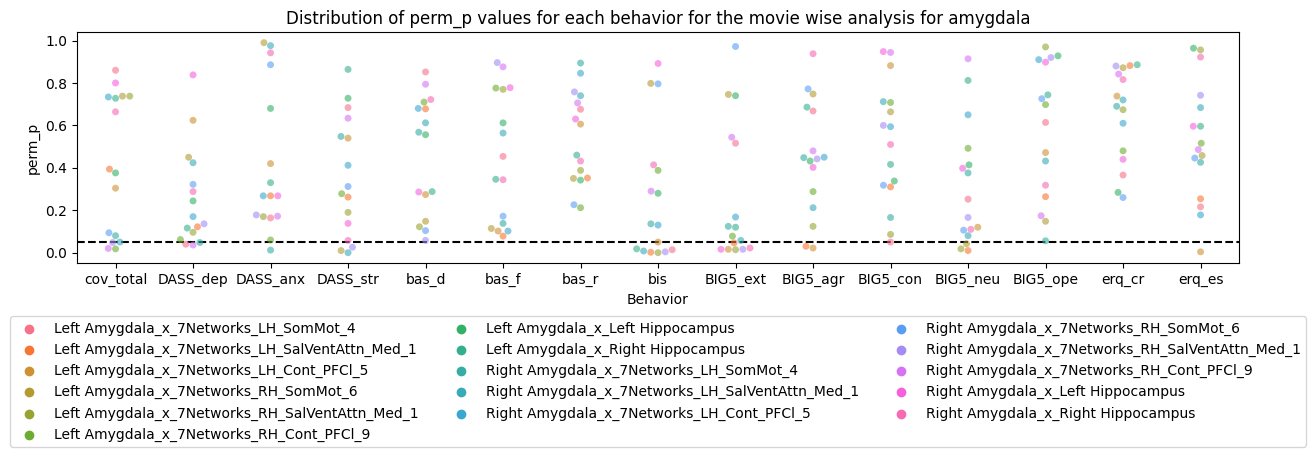

In [14]:
grouped_data = only_movie.groupby('Behavior')['perm_p']

plt.figure(figsize=(15, 3))
sns.swarmplot(data=only_movie, x='Behavior', y='perm_p', hue ='Connection')

plt.xticks(only_movie['Behavior'].unique())
plt.axhline(y=0.05, color='black', linestyle='--')

plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.title('Distribution of perm_p values for each behavior for the movie wise analysis for amygdala')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

plt.show()

In [9]:
#keep only the significant results
only_movie_significant = only_movie[only_movie['perm_p'] < 0.05]
only_movie_significant = only_movie_significant.reset_index(drop=True)
only_movie_significant

,Behavior,Connection,r,p,perm_p
0,cov_total,Left Amygdala_x_7Networks_RH_Cont_PFCl_9,-0.119617,0.025020,0.018
1,cov_total,Right Amygdala_x_7Networks_RH_SalVentAttn_Med_1,-0.117374,0.027895,0.048
2,cov_total,Right Amygdala_x_7Networks_RH_Cont_PFCl_9,-0.135433,0.011086,0.020
3,DASS_dep,Left Amygdala_x_7Networks_LH_SomMot_4,0.096784,0.070136,0.040
4,DASS_dep,Right Amygdala_x_7Networks_LH_SomMot_4,0.104788,0.049810,0.048
5,DASS_dep,Right Amygdala_x_7Networks_RH_Cont_PFCl_9,0.109272,0.040753,0.036
6,DASS_anx,Right Amygdala_x_7Networks_LH_SomMot_4,0.131422,0.013736,0.012
7,DASS_str,Left Amygdala_x_7Networks_RH_SomMot_6,-0.128858,0.015709,0.010
8,DASS_str,Right Amygdala_x_7Networks_LH_SalVentAttn_Med_1,-0.183370,0.000555,0.000
9,DASS_str,Right Amygdala_x_7Networks_RH_SalVentAttn_Med_1,-0.116078,0.029681,0.026


Anxiety rating evolution + behavior correlated with brain region

Text(0.5, 0, 'TR')

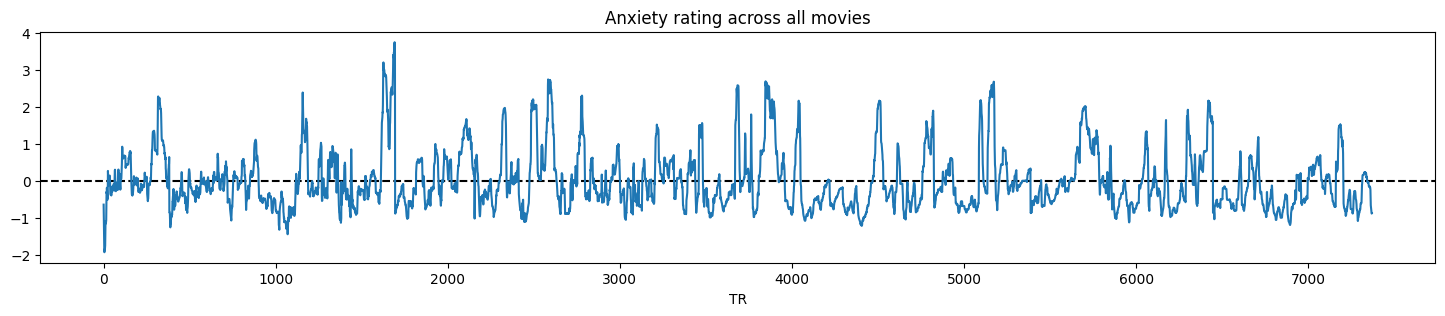

In [52]:
pkl_file = open('Server/Plot/anxiety_rating_all_movies.pkl', "rb")
anxiety_ratings = pickle.load(pkl_file)
pkl_file.close()
plt.figure(figsize=(18, 3))
x = np.arange(0,len(anxiety_ratings),1)
plt.axhline(y=0, color='black', linestyle='--')
plt.plot(x,anxiety_ratings)
plt.title('Anxiety rating across all movies')
plt.xlabel('TR')


In [16]:
TRs_group = group_movie_df[group_movie_df['Connection'].str.contains('TR-')] #will still have some perm_p equal to 0
TRs_group_constraint = TRs_group['Behavior'].str.contains('DASS_anx')
TRs_group_1_behavior = TRs_group[TRs_group_constraint]
TRs_group_1_behavior=TRs_group_1_behavior.reset_index(drop=True)
TRs_group_1_behavior

,Behavior,Connection,r,p,perm_p
0,DASS_anx,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1...,-0.085489,0.109855,0.106
1,DASS_anx,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1...,-0.092534,0.083424,0.094
2,DASS_anx,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1...,-0.096375,0.071334,0.074
3,DASS_anx,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1...,-0.096311,0.071523,0.060
4,DASS_anx,Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1...,-0.091873,0.085661,0.114
...,...,...,...,...,...
117931,DASS_anx,Right Amygdala_x_Right Hippocampus_TR-7367,-0.034484,0.519617,0.532
117932,DASS_anx,Right Amygdala_x_Right Hippocampus_TR-7368,-0.042306,0.429450,0.456
117933,DASS_anx,Right Amygdala_x_Right Hippocampus_TR-7369,-0.048523,0.364738,0.360
117934,DASS_anx,Right Amygdala_x_Right Hippocampus_TR-7370,-0.055842,0.296816,0.320


In [17]:
TRs_group_ra_lAAC_DASS_anx = TRs_group_1_behavior[TRs_group_1_behavior['Connection'].str.contains('Right Amygdala_x_7Networks_LH_SalVentAttn_Med_1')]
TRs_group_ra_lAAC_DASS_anx= TRs_group_ra_lAAC_DASS_anx.reset_index(drop=True)
TRs_group_ra_lAAC_DASS_anx

,Behavior,Connection,r,p,perm_p
0,DASS_anx,Right Amygdala_x_7Networks_LH_SalVentAttn_Med_...,-0.043769,0.413659,0.444
1,DASS_anx,Right Amygdala_x_7Networks_LH_SalVentAttn_Med_...,-0.026201,0.624691,0.594
2,DASS_anx,Right Amygdala_x_7Networks_LH_SalVentAttn_Med_...,-0.005944,0.911642,0.896
3,DASS_anx,Right Amygdala_x_7Networks_LH_SalVentAttn_Med_...,0.014142,0.791764,0.792
4,DASS_anx,Right Amygdala_x_7Networks_LH_SalVentAttn_Med_...,0.034252,0.522427,0.552
...,...,...,...,...,...
7366,DASS_anx,Right Amygdala_x_7Networks_LH_SalVentAttn_Med_...,-0.110746,0.038097,0.038
7367,DASS_anx,Right Amygdala_x_7Networks_LH_SalVentAttn_Med_...,-0.062850,0.240214,0.218
7368,DASS_anx,Right Amygdala_x_7Networks_LH_SalVentAttn_Med_...,-0.020469,0.702339,0.698
7369,DASS_anx,Right Amygdala_x_7Networks_LH_SalVentAttn_Med_...,0.007152,0.893780,0.924


Text(0, 0.5, 'r')

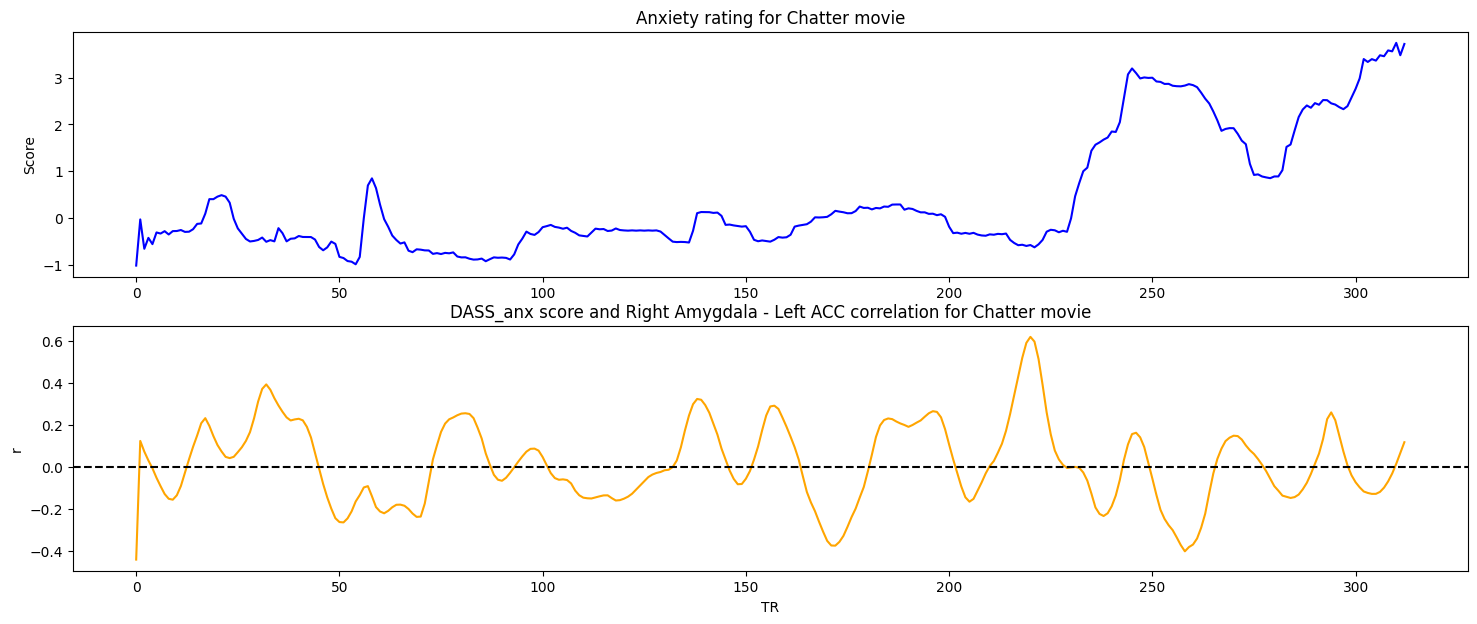

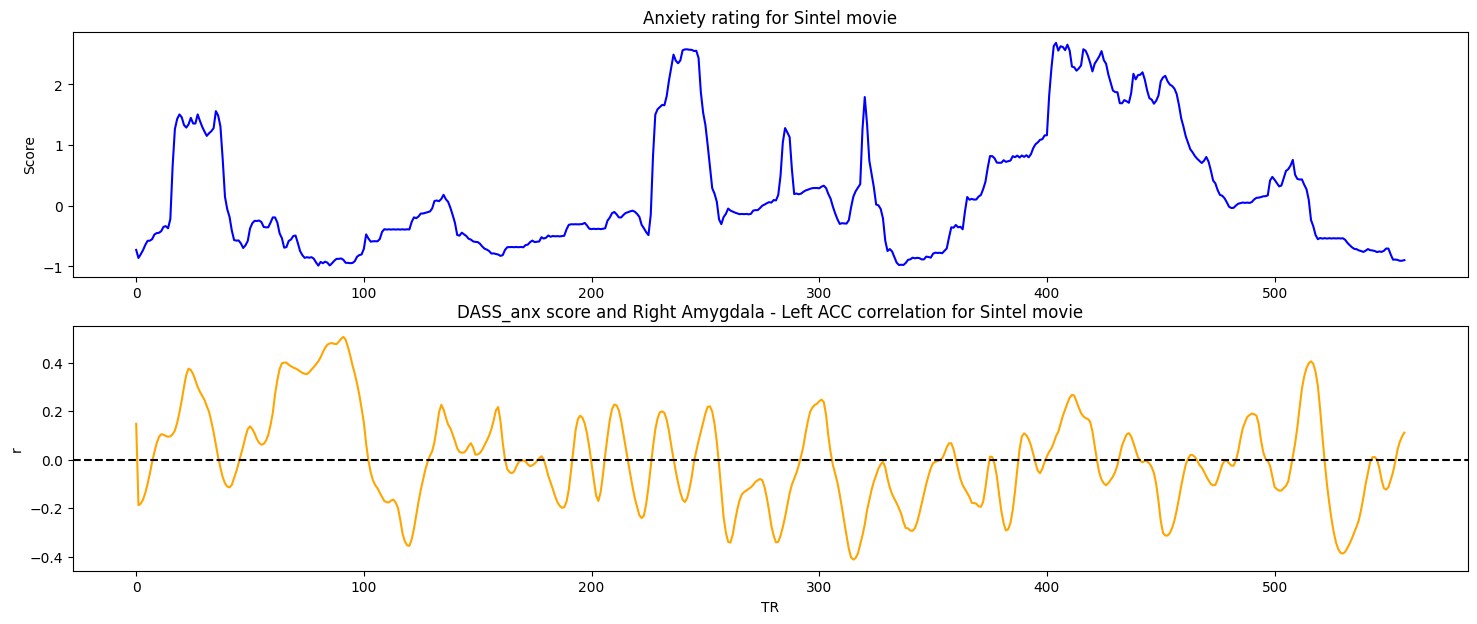

In [18]:
anxiety_ratings_Chatter = anxiety_ratings[1381:1694]
anxiety_ratings_Sintel = anxiety_ratings[3443:4001]

#Chatter
fig=plt.figure(figsize=(18, 7))
x_chatter = np.arange(0,len(anxiety_ratings_Chatter),1)
ax1 = fig.add_subplot(2, 1, 1) 
ax1.plot(x_chatter,anxiety_ratings_Chatter, color = 'blue')
ax1.set_title('Anxiety rating for Chatter movie')
ax1.set_ylabel('Score')
#ax1.set_xlabel('TR')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(x_chatter, TRs_group_ra_lAAC_DASS_anx['r'][1381:1694], color='orange')
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_title('DASS_anx score and Right Amygdala - Left ACC correlation for Chatter movie')
ax2.set_xlabel('TR')
ax2.set_ylabel('r')

#Sintel
fig=plt.figure(figsize=(18, 7))
x_sintel = np.arange(0,len(anxiety_ratings_Sintel),1)
ax1 = fig.add_subplot(2, 1, 1) 
ax1.plot(x_sintel,anxiety_ratings_Sintel, color = 'blue')
ax1.set_title('Anxiety rating for Sintel movie')
ax1.set_ylabel('Score')
#ax1.set_xlabel('TR')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(x_sintel, TRs_group_ra_lAAC_DASS_anx['r'][3443:4001], color='orange')
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_title('DASS_anx score and Right Amygdala - Left ACC correlation for Sintel movie')
ax2.set_xlabel('TR')
ax2.set_ylabel('r')


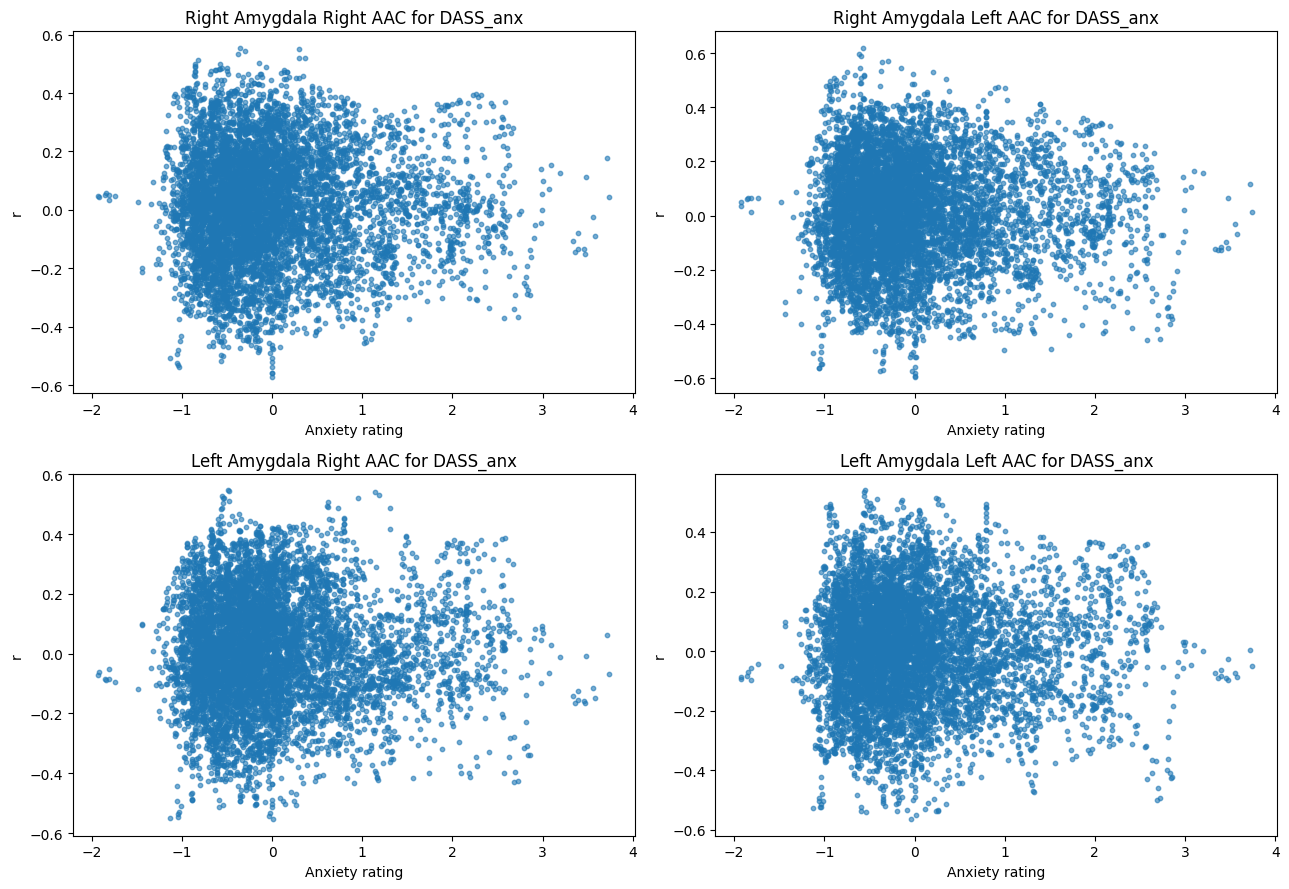

In [41]:
TRs_group_la_lAAC_DASS_anx = TRs_group_1_behavior[TRs_group_1_behavior['Connection'].str.contains('Left Amygdala_x_7Networks_LH_SalVentAttn_Med_1')]
TRs_group_ra_rAAC_DASS_anx = TRs_group_1_behavior[TRs_group_1_behavior['Connection'].str.contains('Right Amygdala_x_7Networks_RH_SalVentAttn_Med_1')]
TRs_group_la_rAAC_DASS_anx = TRs_group_1_behavior[TRs_group_1_behavior['Connection'].str.contains('Left Amygdala_x_7Networks_RH_SalVentAttn_Med_1')]

fig, axs = plt.subplots(2, 2, figsize=(13,9))

# Sous-graphique 1
axs[0, 1].scatter(anxiety_ratings, TRs_group_ra_lAAC_DASS_anx['r'], alpha=0.6, s=10)
axs[0, 1].set_xlabel('Anxiety rating')
axs[0, 1].set_ylabel('r')
axs[0, 1].set_title('Right Amygdala Left AAC for DASS_anx')

# Sous-graphique 2
axs[0, 0].scatter(anxiety_ratings, TRs_group_ra_rAAC_DASS_anx['r'], alpha=0.6, s=10)
axs[0, 0].set_xlabel('Anxiety rating')
axs[0, 0].set_ylabel('r')
axs[0, 0].set_title('Right Amygdala Right AAC for DASS_anx')

# Sous-graphique 3
axs[1, 0].scatter(anxiety_ratings, TRs_group_la_rAAC_DASS_anx['r'], alpha=0.6, s=10)
axs[1, 0].set_xlabel('Anxiety rating')
axs[1, 0].set_ylabel('r')
axs[1, 0].set_title('Left Amygdala Right AAC for DASS_anx')

# Sous-graphique 4
axs[1, 1].scatter(anxiety_ratings, TRs_group_la_lAAC_DASS_anx['r'], alpha=0.6, s=10)
axs[1, 1].set_xlabel('Anxiety rating')
axs[1, 1].set_ylabel('r')
axs[1, 1].set_title('Left Amygdala Left AAC for DASS_anx')

# Ajustement automatique des espacements entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()

In [68]:
len(TRs_group_ra_lAAC_DASS_anx), 

7371

Hippocampus

In [20]:
hip_TRs= pd.read_csv('Server/TRs_wise_Hippocampus_group_results_10000_perms.csv')
hip_movie=pd.read_csv('Server/all_Hippocampus_Movie_wise_group_analsysis_500_perms.csv')
hip_only_movie = hip_movie[~hip_movie['Connection'].str.contains('TR-')] #remove the TR analysis to the result
hip_only_movie = hip_only_movie.reset_index(drop=True)

In [21]:
hip_TRs_significant = hip_TRs[hip_TRs['perm_p'] < 0.05]
hip_TRs_significant = hip_TRs_significant.reset_index(drop=True)
hip_TRs_significant

,Unnamed: 0,Behavior,Connection,r,p,perm_p
0,0,cov_total,Left Hippocampus_x_7Networks_LH_SalVentAttn_Med_1,-0.025365,0.029431,0.0307
1,3,DASS_str,Left Hippocampus_x_7Networks_LH_SalVentAttn_Med_1,-0.047282,0.000049,0.0000
2,4,bas_d,Left Hippocampus_x_7Networks_LH_SalVentAttn_Med_1,-0.028775,0.013491,0.0138
3,5,bas_f,Left Hippocampus_x_7Networks_LH_SalVentAttn_Med_1,-0.054384,0.000003,0.0000
4,6,bas_r,Left Hippocampus_x_7Networks_LH_SalVentAttn_Med_1,-0.028186,0.015522,0.0141
...,...,...,...,...,...,...
138,231,bas_r,Right Hippocampus_x_Right Amygdala,0.042175,0.000292,0.0001
139,233,BIG5_ext,Right Hippocampus_x_Right Amygdala,0.049547,0.000021,0.0000
140,234,BIG5_agr,Right Hippocampus_x_Right Amygdala,0.048453,0.000032,0.0000
141,235,BIG5_con,Right Hippocampus_x_Right Amygdala,0.036687,0.001631,0.0020


TR Wise

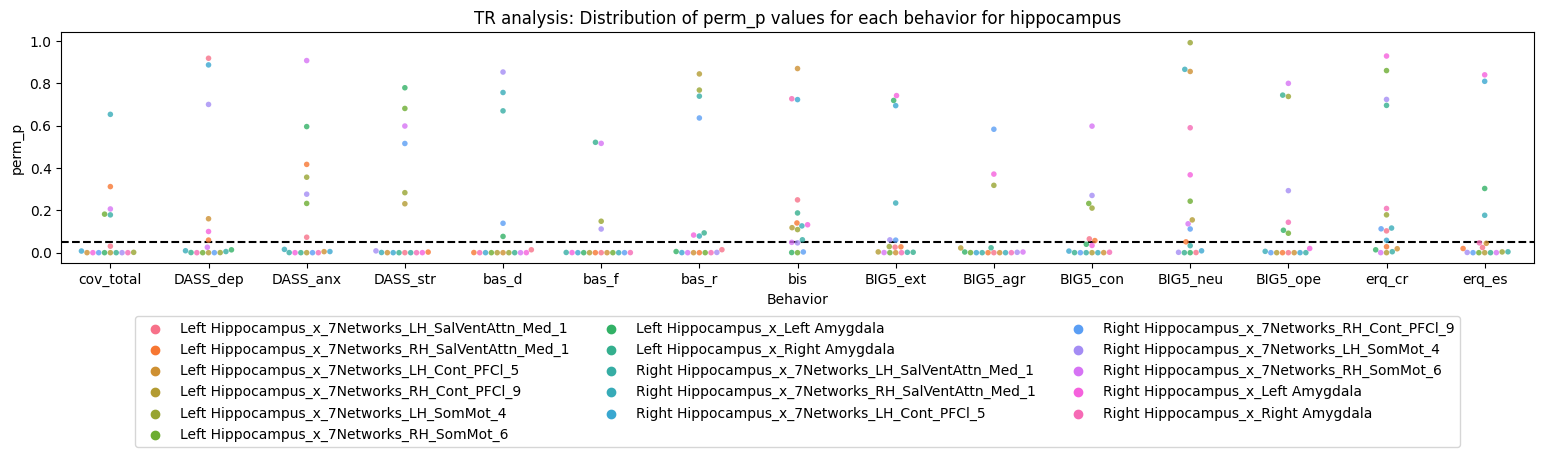

In [27]:
grouped_data = hip_TRs.groupby('Behavior')['perm_p']

# Créer un scatter plot pour chaque comportement avec seaborn.swarmplot()
plt.figure(figsize=(19, 3))
sns.swarmplot(data=hip_TRs, x='Behavior', y='perm_p', s=4, hue='Connection')

# Configurer l'axe des x
plt.xticks(hip_TRs['Behavior'].unique())
plt.axhline(y=0.05, color='black', linestyle='--')

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.title('TR analysis: Distribution of perm_p values for each behavior for hippocampus')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
#plt.ylim(0,0.05)

# Afficher le graphique
plt.show()

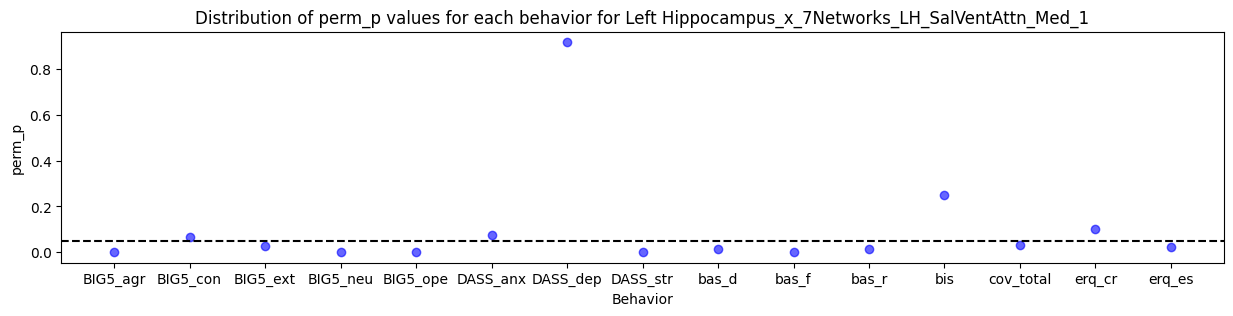

In [29]:
region = 'Left Hippocampus_x_7Networks_LH_SalVentAttn_Med_1'
grouped_data_hip = hip_TRs[hip_TRs['Connection'].str.contains(region)]
grouped_data_hip = grouped_data_hip.groupby('Behavior')['perm_p']
plt.figure(figsize=(15, 3))

# Créer un scatter plot pour chaque comportement
for behavior, group in grouped_data_hip:
    plt.scatter([behavior] * len(group), group, marker= 'o', alpha = 0.6, color='blue')

# Configurer l'axe des x
plt.xticks(hip_TRs['Behavior'].unique())

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.title('Distribution of perm_p values for each behavior for ' + region)
plt.axhline(y=0.05, color='black', linestyle='--')

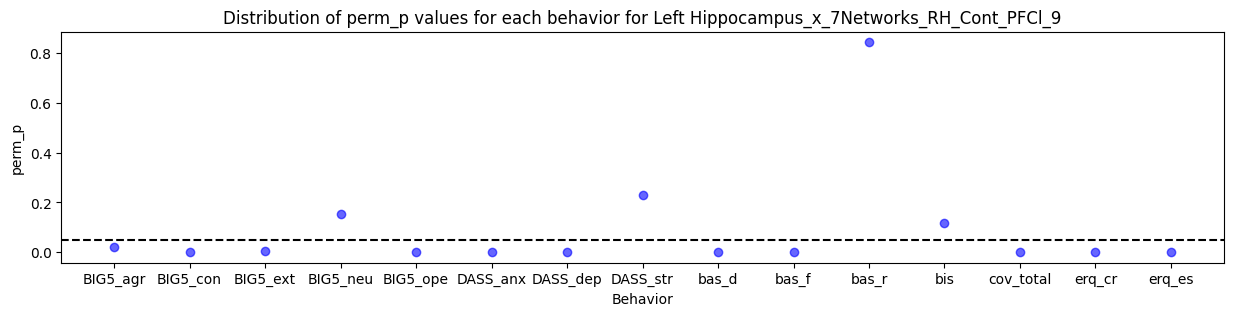

In [46]:
region1 = 'Left Hippocampus_x_7Networks_RH_Cont_PFCl_9'
grouped_data_hip1 = hip_TRs[hip_TRs['Connection'].str.contains(region1)]
grouped_data_hip1 = grouped_data_hip1.groupby('Behavior')['perm_p']
plt.figure(figsize=(15, 3))

# Créer un scatter plot pour chaque comportement
for behavior, group in grouped_data_hip1:
    plt.scatter([behavior] * len(group), group, marker= 'o', alpha = 0.6, color='blue')

# Configurer l'axe des x
plt.xticks(hip_TRs['Behavior'].unique())

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.title('Distribution of perm_p values for each behavior for ' + region1)
plt.axhline(y=0.05, color='black', linestyle='--')

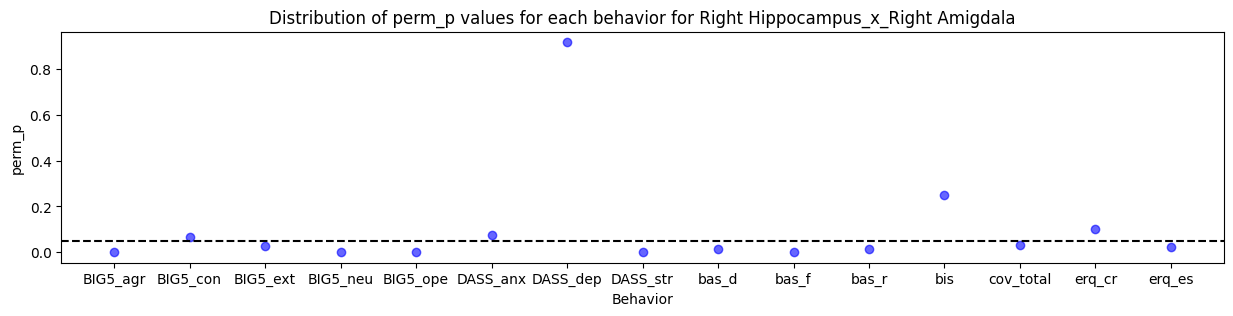

In [37]:
region2 = 'Right Hippocampus_x_Right Amigdala'
grouped_data_hip2 = hip_TRs[hip_TRs['Connection'].str.contains(region)]
grouped_data_hip2 = grouped_data_hip2.groupby('Behavior')['perm_p']
plt.figure(figsize=(15, 3))

# Créer un scatter plot pour chaque comportement
for behavior, group in grouped_data_hip2:
    plt.scatter([behavior] * len(group), group, marker= 'o', alpha = 0.6, color='blue')

# Configurer l'axe des x
plt.xticks(hip_TRs['Behavior'].unique())

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.title('Distribution of perm_p values for each behavior for ' + region2)
plt.axhline(y=0.05, color='black', linestyle='--')

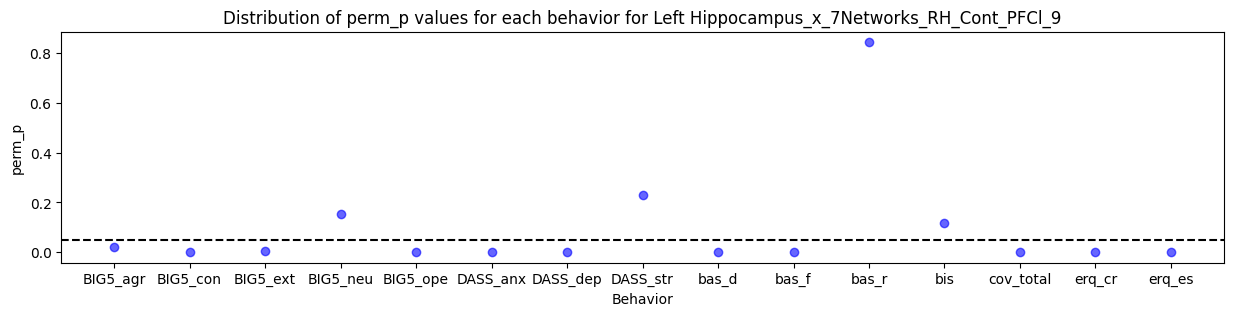

In [50]:
region3 = 'Left Hippocampus_x_7Networks_RH_Cont_PFCl_9'
grouped_data_hip3 = hip_TRs[hip_TRs['Connection'].str.contains(region1)]
grouped_data_hip3 = grouped_data_hip3.groupby('Behavior')['perm_p']
plt.figure(figsize=(15, 3))

# Créer un scatter plot pour chaque comportement
for behavior, group in grouped_data_hip3:
    plt.scatter([behavior] * len(group), group, marker= 'o', alpha = 0.6, color='blue')

# Configurer l'axe des x
plt.xticks(hip_TRs['Behavior'].unique())

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.title('Distribution of perm_p values for each behavior for ' + region3)
plt.axhline(y=0.05, color='black', linestyle='--')

In [60]:
hip_TRs_DASS_str = hip_TRs[hip_TRs['Behavior'].str.contains('DASS_str')]
hip_TRs_DASS_str

,Unnamed: 0,Behavior,Connection,r,p,perm_p
3,3,DASS_str,Left Hippocampus_x_7Networks_LH_SalVentAttn_Med_1,-0.047282,4.887528e-05,0.0000
18,18,DASS_str,Left Hippocampus_x_7Networks_RH_SalVentAttn_Med_1,-0.034984,2.664739e-03,0.0028
33,33,DASS_str,Left Hippocampus_x_7Networks_LH_Cont_PFCl_5,-0.044003,1.574416e-04,0.0001
48,48,DASS_str,Left Hippocampus_x_7Networks_RH_Cont_PFCl_9,0.013828,2.352040e-01,0.2311
63,63,DASS_str,Left Hippocampus_x_7Networks_LH_SomMot_4,-0.012433,2.858326e-01,0.2835
78,78,DASS_str,Left Hippocampus_x_7Networks_RH_SomMot_6,-0.004762,6.827228e-01,0.6812
93,93,DASS_str,Left Hippocampus_x_Left Amygdala,-0.003293,7.774222e-01,0.7790
108,108,DASS_str,Left Hippocampus_x_Right Amygdala,-0.086568,9.694510e-14,0.0000
123,123,DASS_str,Right Hippocampus_x_7Networks_LH_SalVentAttn_M...,-0.054774,2.534618e-06,0.0000
138,138,DASS_str,Right Hippocampus_x_7Networks_RH_SalVentAttn_M...,-0.038570,9.261002e-04,0.0008


In [67]:
hip_TRs_DASS_str = hip_movie[hip_movie['Behavior'].str.contains('DASS_str')]
hip_TRs_DASS_str_lAAC_l = hip_TRs_DASS_str[hip_TRs_DASS_str['Connection'].str.contains('Left Hippocampus_x_7Networks_RH_SalVentAttn_Med_1')]
len(hip_TRs_DASS_str_lAAC_l), len(anxiety_ratings)

(7372, 7371)

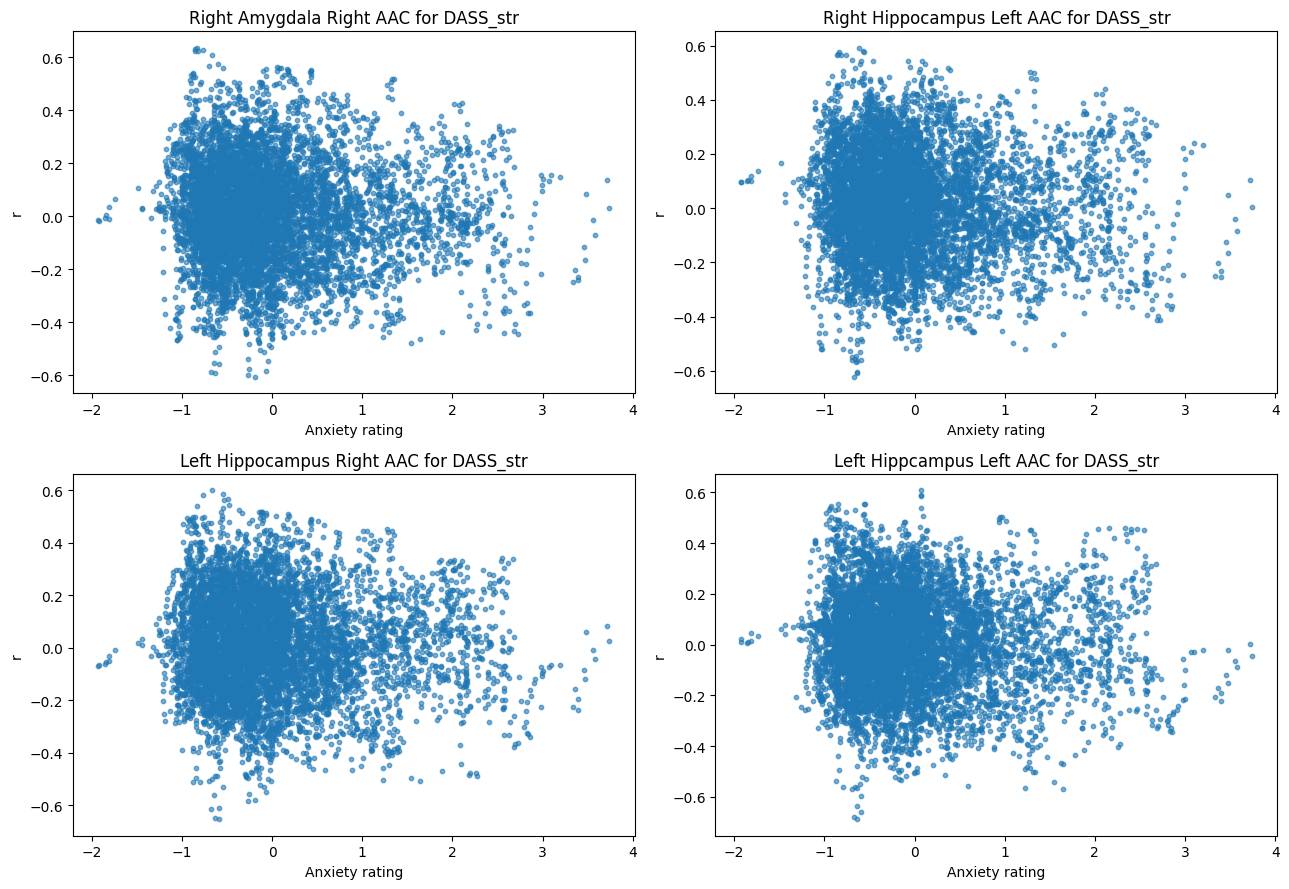

In [71]:
hip_TRs_DASS_str = hip_movie[hip_movie['Behavior'].str.contains('DASS_str')]
hip_TRs_DASS_str = hip_TRs_DASS_str[hip_TRs_DASS_str['Connection'].str.contains('_TR-')]
hip_TRs_DASS_str_lAAC_l = hip_TRs_DASS_str[hip_TRs_DASS_str['Connection'].str.contains('Left Hippocampus_x_7Networks_LH_SalVentAttn_Med_1')]
hip_TRs_DASS_str_lAAC_r = hip_TRs_DASS_str[hip_TRs_DASS_str['Connection'].str.contains('Right Hippocampus_x_7Networks_LH_SalVentAttn_Med_1')]
hip_TRs_DASS_str_rAAC_l = hip_TRs_DASS_str[hip_TRs_DASS_str['Connection'].str.contains('Left Hippocampus_x_7Networks_RH_SalVentAttn_Med_1')]
hip_TRs_DASS_str_rAAC_r = hip_TRs_DASS_str[hip_TRs_DASS_str['Connection'].str.contains('Right Hippocampus_x_7Networks_RH_SalVentAttn_Med_1')]


fig, axs = plt.subplots(2, 2, figsize=(13,9))

# Sous-graphique 1
axs[0, 1].scatter(anxiety_ratings, hip_TRs_DASS_str_lAAC_r['r'], alpha=0.6, s=10)
axs[0, 1].set_xlabel('Anxiety rating')
axs[0, 1].set_ylabel('r')
axs[0, 1].set_title('Right Hippocampus Left AAC for DASS_str')

# Sous-graphique 2
axs[0, 0].scatter(anxiety_ratings, hip_TRs_DASS_str_rAAC_r['r'], alpha=0.6, s=10)
axs[0, 0].set_xlabel('Anxiety rating')
axs[0, 0].set_ylabel('r')
axs[0, 0].set_title('Right Amygdala Right AAC for DASS_str')

# Sous-graphique 3
axs[1, 0].scatter(anxiety_ratings, hip_TRs_DASS_str_rAAC_l['r'], alpha=0.6, s=10)
axs[1, 0].set_xlabel('Anxiety rating')
axs[1, 0].set_ylabel('r')
axs[1, 0].set_title('Left Hippocampus Right AAC for DASS_str')

# Sous-graphique 4
axs[1, 1].scatter(anxiety_ratings, hip_TRs_DASS_str_lAAC_l['r'], alpha=0.6, s=10)
axs[1, 1].set_xlabel('Anxiety rating')
axs[1, 1].set_ylabel('r')
axs[1, 1].set_title('Left Hippcampus Left AAC for DASS_str')

# Ajustement automatique des espacements entre les sous-graphiques
plt.tight_layout()

# Affichage de la figure
plt.show()

Movie wise

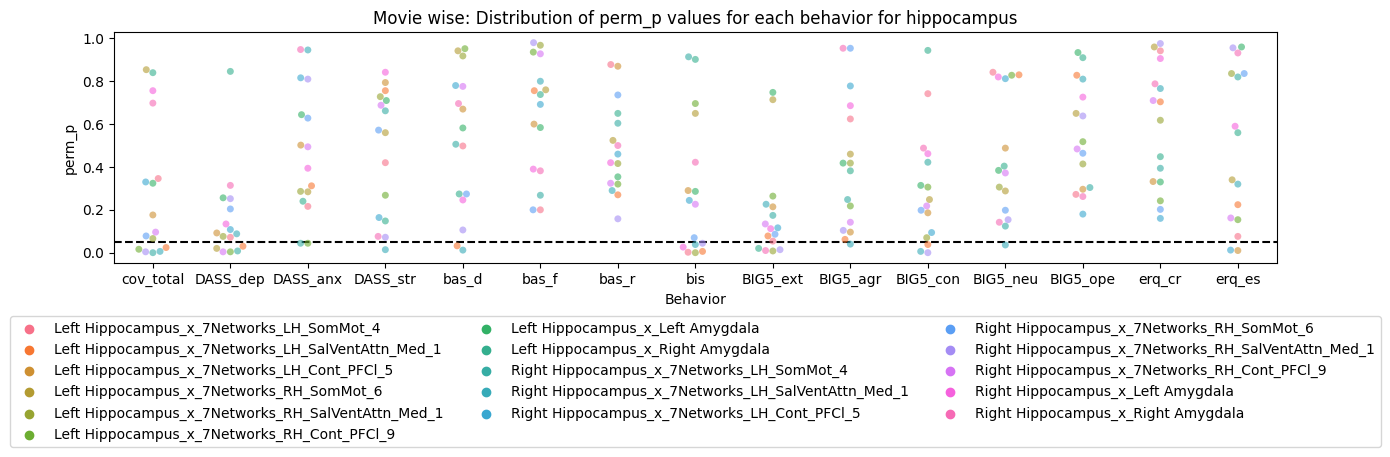

In [23]:
grouped_data = hip_only_movie.groupby('Behavior')['perm_p']

# Créer un scatter plot pour chaque comportement avec seaborn.swarmplot()
plt.figure(figsize=(15, 3))
sns.swarmplot(data=hip_only_movie, x='Behavior', y='perm_p', hue='Connection')

# Configurer l'axe des x
plt.xticks(hip_only_movie['Behavior'].unique())
plt.axhline(y=0.05, color='black', linestyle='--')

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('perm_p')
#plt.ylim(0,0.05)
plt.title('Movie wise: Distribution of perm_p values for each behavior for hippocampus')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

# Afficher le graphique
plt.show()

dlPFC

In [3]:
dlPFC_TRs= pd.read_csv('Server/TRs_wise_dlPFC_group_results_10000_perms.csv')
dlPFC_movie=pd.read_csv('Server/all_dlPFC_Movie_wise_group_analysis_500_perms.csv')
dlPFC_only_movie = dlPFC_movie[~dlPFC_movie['Connection'].str.contains('TR-')] #remove the TR analysis to the result
dlPFC_only_movie = dlPFC_only_movie.reset_index(drop=True)

In [4]:
dlPFC_TRs_significant = dlPFC_TRs[dlPFC_TRs['perm_p'] < 0.05]
dlPFC_TRs_significant = dlPFC_TRs_significant.reset_index(drop=True)
dlPFC_TRs_significant

,Unnamed: 0,Behavior,Connection,r,p,perm_p
0,0,cov_total,7Networks_LH_Cont_PFCl_5_x_7Networks_LH_SalVen...,0.040212,5.540709e-04,0.0009
1,4,bas_d,7Networks_LH_Cont_PFCl_5_x_7Networks_LH_SalVen...,-0.025590,2.801709e-02,0.0303
2,6,bas_r,7Networks_LH_Cont_PFCl_5_x_7Networks_LH_SalVen...,-0.037600,1.243621e-03,0.0016
3,10,BIG5_con,7Networks_LH_Cont_PFCl_5_x_7Networks_LH_SalVen...,-0.070149,1.649570e-09,0.0000
4,12,BIG5_ope,7Networks_LH_Cont_PFCl_5_x_7Networks_LH_SalVen...,-0.023807,4.096344e-02,0.0437
...,...,...,...,...,...,...
153,233,BIG5_ext,7Networks_RH_Cont_PFCl_9_x_Right Amygdala,-0.039737,6.440860e-04,0.0003
154,234,BIG5_agr,7Networks_RH_Cont_PFCl_9_x_Right Amygdala,-0.029944,1.014157e-02,0.0094
155,235,BIG5_con,7Networks_RH_Cont_PFCl_9_x_Right Amygdala,-0.026705,2.186229e-02,0.0224
156,236,BIG5_neu,7Networks_RH_Cont_PFCl_9_x_Right Amygdala,-0.035512,2.293382e-03,0.0024


TR wise

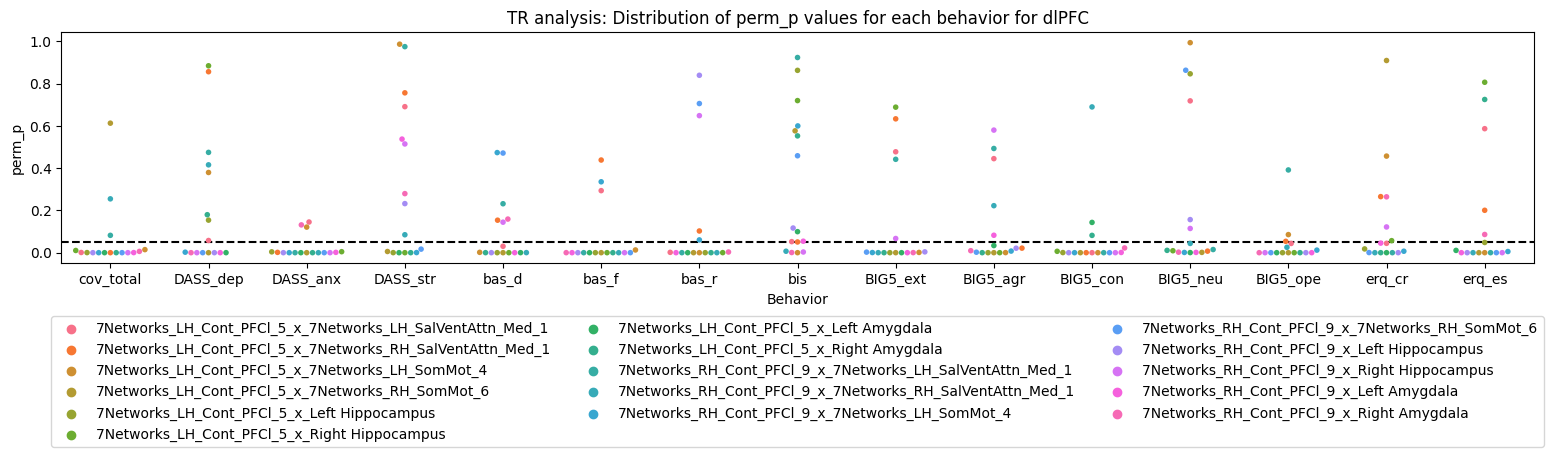

In [6]:
grouped_data = dlPFC_TRs.groupby('Behavior')['perm_p']

# Créer un scatter plot pour chaque comportement avec seaborn.swarmplot()
plt.figure(figsize=(19, 3))
sns.swarmplot(data=dlPFC_TRs, x='Behavior', y='perm_p', s=4, hue='Connection')

# Configurer l'axe des x
plt.xticks(dlPFC_TRs['Behavior'].unique())
plt.axhline(y=0.05, color='black', linestyle='--')

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.title('TR analysis: Distribution of perm_p values for each behavior for dlPFC')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
#plt.ylim(0,0.05)

# Afficher le graphique
plt.show()

Movie wise

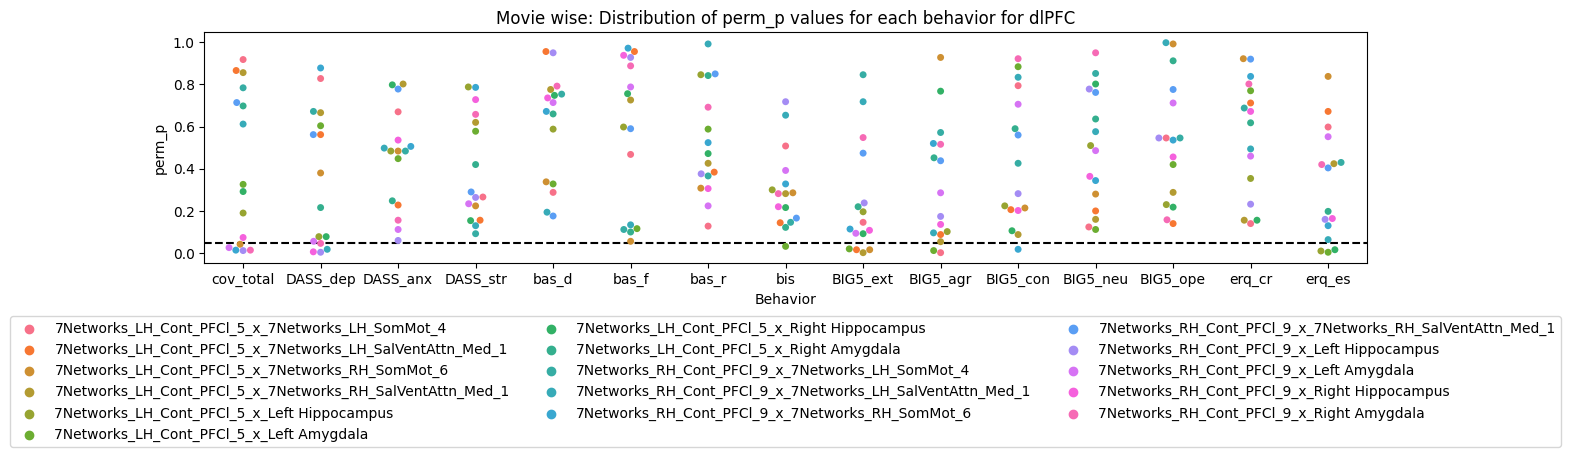

In [7]:
grouped_data = dlPFC_only_movie.groupby('Behavior')['perm_p']

# Créer un scatter plot pour chaque comportement avec seaborn.swarmplot()
plt.figure(figsize=(15, 3))
sns.swarmplot(data=dlPFC_only_movie, x='Behavior', y='perm_p', hue='Connection')

# Configurer l'axe des x
plt.xticks(dlPFC_only_movie['Behavior'].unique())
plt.axhline(y=0.05, color='black', linestyle='--')

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('perm_p')
#plt.ylim(0,0.05)
plt.title('Movie wise: Distribution of perm_p values for each behavior for dlPFC')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

# Afficher le graphique
plt.show()

Insula

In [9]:
Insula_TRs= pd.read_csv('Server/TRs_wise_Insula_group_results_10000_perms.csv')
Insula_movie=pd.read_csv('Server/all_Insula_Movie_wise_group_analysis_500_perms.csv')
Insula_only_movie = Insula_movie[~Insula_movie['Connection'].str.contains('TR-')] #remove the TR analysis to the result
Insula_only_movie = Insula_only_movie.reset_index(drop=True)

In [10]:
Insula_TRs_significant = Insula_TRs[dlPFC_TRs['perm_p'] < 0.05]
Insula_TRs_significant = Insula_TRs_significant.reset_index(drop=True)
Insula_TRs_significant

,Unnamed: 0,Behavior,Connection,r,p,perm_p
0,0,cov_total,7Networks_LH_SomMot_4_x_7Networks_LH_SalVentAt...,-0.054621,2.703206e-06,0.0000
1,4,bas_d,7Networks_LH_SomMot_4_x_7Networks_LH_SalVentAt...,0.007047,5.452434e-01,0.5494
2,6,bas_r,7Networks_LH_SomMot_4_x_7Networks_LH_SalVentAt...,-0.076934,3.745237e-11,0.0000
3,10,BIG5_con,7Networks_LH_SomMot_4_x_7Networks_LH_SalVentAt...,0.020412,7.971352e-02,0.0806
4,12,BIG5_ope,7Networks_LH_SomMot_4_x_7Networks_LH_SalVentAt...,-0.000794,9.456753e-01,0.9465
...,...,...,...,...,...,...
153,233,BIG5_ext,7Networks_RH_SomMot_6_x_Right Amygdala,0.003954,7.343229e-01,0.7221
154,234,BIG5_agr,7Networks_RH_SomMot_6_x_Right Amygdala,-0.029171,1.225864e-02,0.0122
155,235,BIG5_con,7Networks_RH_SomMot_6_x_Right Amygdala,-0.006024,6.050942e-01,0.5990
156,236,BIG5_neu,7Networks_RH_SomMot_6_x_Right Amygdala,0.071703,7.140152e-10,0.0000


TR wise

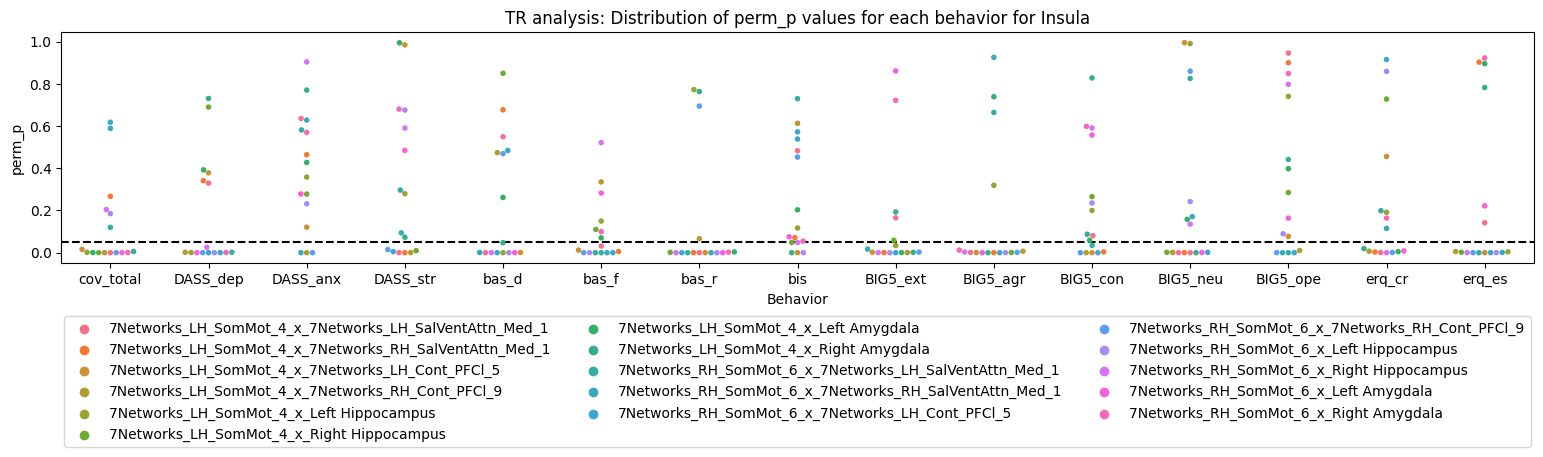

In [11]:
grouped_data = Insula_TRs.groupby('Behavior')['perm_p']

# Créer un scatter plot pour chaque comportement avec seaborn.swarmplot()
plt.figure(figsize=(19, 3))
sns.swarmplot(data=Insula_TRs, x='Behavior', y='perm_p', s=4, hue='Connection')

# Configurer l'axe des x
plt.xticks(Insula_TRs['Behavior'].unique())
plt.axhline(y=0.05, color='black', linestyle='--')

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('perm_p')
plt.title('TR analysis: Distribution of perm_p values for each behavior for Insula')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)
#plt.ylim(0,0.05)

# Afficher le graphique
plt.show()

Movie wise

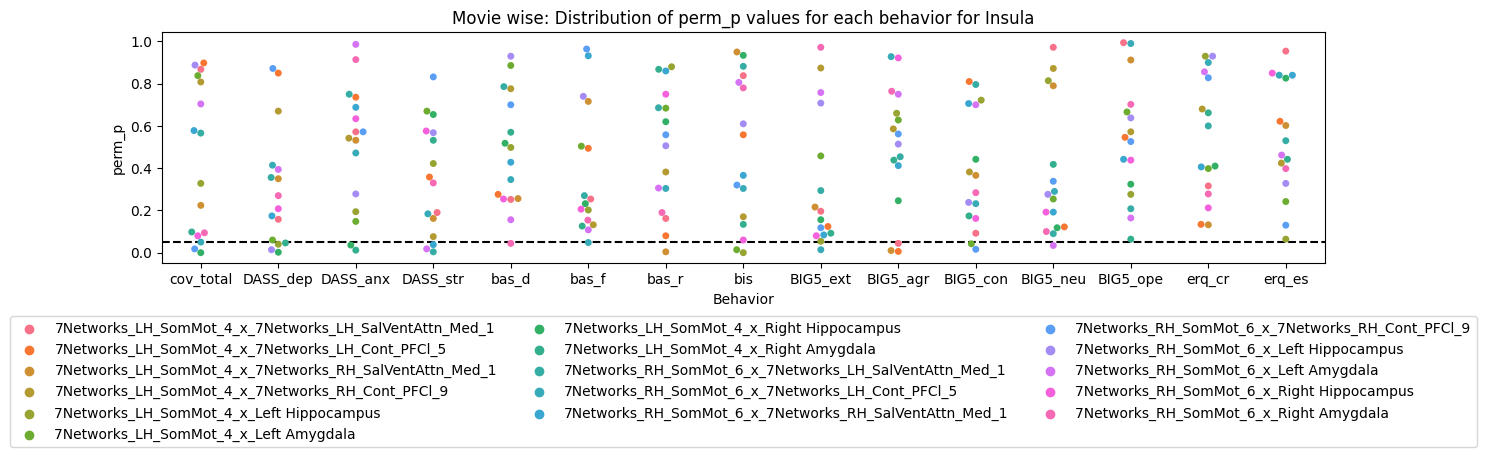

In [12]:
grouped_data = Insula_only_movie.groupby('Behavior')['perm_p']

# Créer un scatter plot pour chaque comportement avec seaborn.swarmplot()
plt.figure(figsize=(15, 3))
sns.swarmplot(data=Insula_only_movie, x='Behavior', y='perm_p', hue='Connection')

# Configurer l'axe des x
plt.xticks(Insula_only_movie['Behavior'].unique())
plt.axhline(y=0.05, color='black', linestyle='--')

# Ajouter des étiquettes et des titres
plt.xlabel('Behavior')
plt.ylabel('perm_p')
#plt.ylim(0,0.05)
plt.title('Movie wise: Distribution of perm_p values for each behavior for Insula')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=3)

# Afficher le graphique
plt.show()